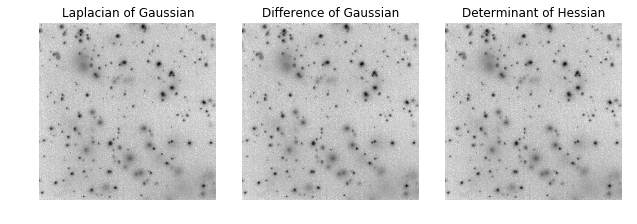

In [6]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.signal import find_peaks
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import matplotlib as mpl
import math
from operator import add
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
from skimage.feature import peak_local_max
from scipy.ndimage.morphology import distance_transform_edt as edt
from IPython.display import clear_output
import timeit

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(20, 20))
mpl.rc('image', cmap='gray')
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

frames = pims.ImageSequence('images/05_04_19/Done/30ul_Indium_dots_spun_down_dish2_kgluc_region1_/jpgs/*.jpg', as_grey=True)

total_frames = len(frames)

image1= np.int64(frames[0])
for frameNum in range(1, total_frames-1):
    image1 = image1-np.int64(frames[frameNum])

image_gray = rgb2gray(image1)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image1, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()